<div style="background-color: #c3e8fb; padding: 10px; color: #144d84;">
<b>Exercise 4) Visualization with GradCAM</b><br>
Using the GradCAM method, input an image of your choice into a model of your choice and plot the region of attention.
</div>

In [1]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt

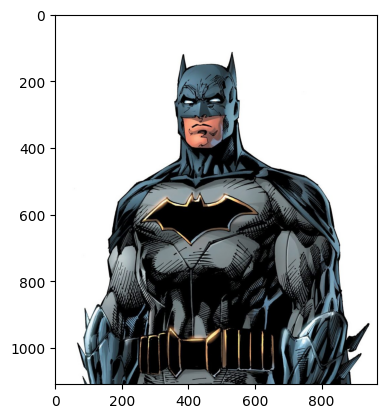

In [2]:
img = cv2.imread('batman.jpg')
plt.imshow(img[...,::-1])
img = cv2.resize(img, (224, 224))
img = np.expand_dims(img, axis=0)
img = tf.keras.applications.vgg16.preprocess_input(img)

In [3]:
model = VGG16(weights='imagenet', input_tensor=Input(shape=(224, 224, 3)))
preds = model.predict(img)
predicted_class = np.argmax(preds[0])

with tf.GradientTape() as tape:
    last_conv_layer = model.get_layer('block5_conv3')
    iterate = Model([model.input], [model.output, last_conv_layer.output])
    model_out, last_conv_layer_output = iterate(img)
    class_channel = model_out[:, predicted_class]

grads = tape.gradient(class_channel, last_conv_layer_output)[0]
pooled_grads = tf.reduce_mean(grads, axis=(0, 1))

heatmap = last_conv_layer_output[0] @ pooled_grads[..., tf.newaxis]
heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


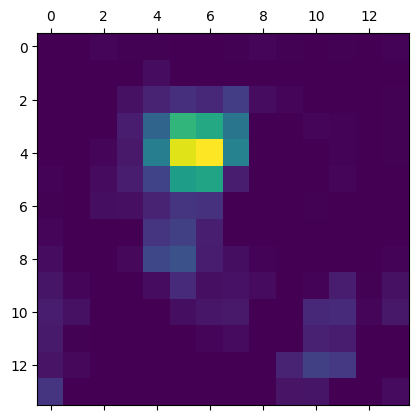

In [5]:
plt.matshow(heatmap)
plt.show()

___

### Defining funtions, each for different layers

In [6]:
model.layers

[<InputLayer name=input_layer, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <MaxPooling2D name=block4_pool, built=True>,
 <Conv2D name=block5_conv1, built=True>,
 <Conv2D name=block5_conv2, built=True>,
 <Conv2D name=block5_conv3, built=True>,
 <MaxPooling2D name=block5_pool, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=fc1, built=True>,
 <Dense name=fc2, built=True>,
 <Dense name=predictions, built=True>]

In [29]:
# using last layer

def show_heatmap_1(image_path):
  img = cv2.imread(image_path)
  image = img.copy()
  img = cv2.resize(img, (224, 224))
  img = np.expand_dims(img, axis=0)
  img = tf.keras.applications.vgg16.preprocess_input(img)

  preds = model.predict(img)
  predicted_class = np.argmax(preds[0])

  with tf.GradientTape() as tape:
    last_conv_layer = model.get_layer('block5_conv3') ###
    iterate = Model([model.input], [model.output, last_conv_layer.output])
    model_out, last_conv_layer_output = iterate(img)
    class_channel = model_out[:, predicted_class]

  grads = tape.gradient(class_channel, last_conv_layer_output)[0]
  pooled_grads = tf.reduce_mean(grads, axis=(0, 1))

  heatmap = last_conv_layer_output[0] @ pooled_grads[..., tf.newaxis]
  heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap)

  plt.imshow(image[...,::-1]);
  plt.matshow(heatmap);

  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


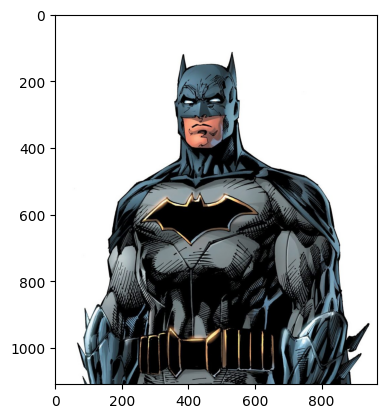

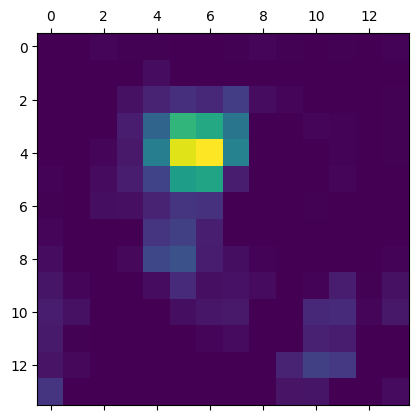

In [24]:
show_heatmap_1('batman.jpg')

In [41]:
# using other layers:

def show_heatmap_2(image_path):
  img = cv2.imread(image_path)
  image = img.copy()
  img = cv2.resize(img, (224, 224))
  img = np.expand_dims(img, axis=0)
  img = tf.keras.applications.vgg16.preprocess_input(img)

  preds = model.predict(img)
  predicted_class = np.argmax(preds[0])

  with tf.GradientTape() as tape:
    last_conv_layer = model.get_layer('block3_conv3') # block name has changed
    iterate = Model([model.input], [model.output, last_conv_layer.output])
    model_out, last_conv_layer_output = iterate(img)
    class_channel = model_out[:, predicted_class]

  grads = tape.gradient(class_channel, last_conv_layer_output)[0]
  pooled_grads = tf.reduce_mean(grads, axis=(0, 1))

  heatmap = last_conv_layer_output[0] @ pooled_grads[..., tf.newaxis]
  heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap)

  plt.imshow(image[...,::-1]);
  plt.matshow(heatmap);

  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step


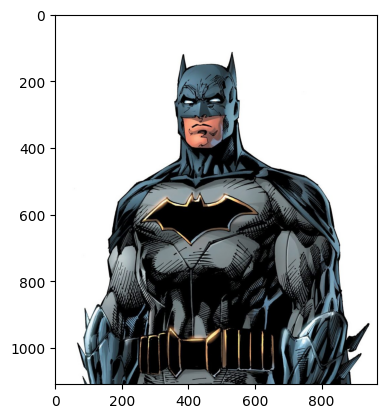

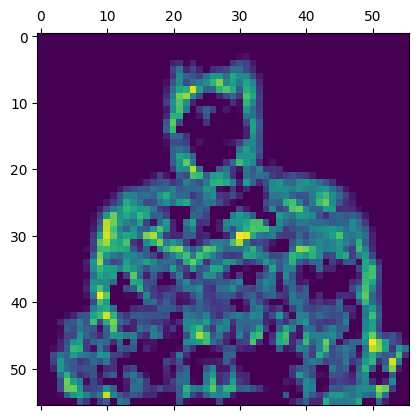

In [42]:
show_heatmap_2('batman.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step


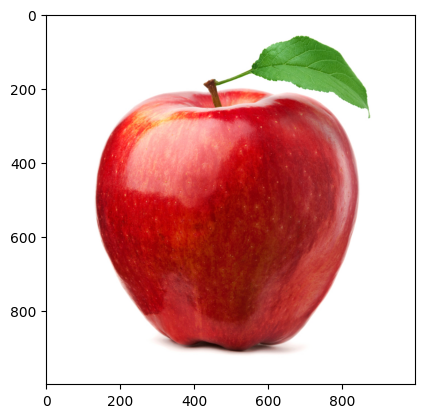

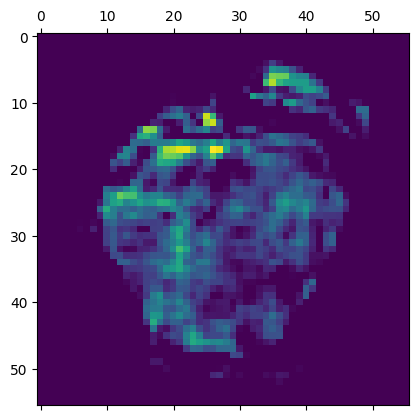

In [43]:
show_heatmap_2('apple.jpg')